In [1]:
%load_ext autoreload
%autoreload 2
from Maze import Maze, animate
import QLearner as ql
#import DeepQNetwork as dqn
#import DeepQN as qn

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from __future__ import print_function
import random as rand
import imageio
import glob
import os
import shutil

In [3]:
from IPython.display import HTML
import random

In [20]:
maze = Maze('testworlds/world10.csv')

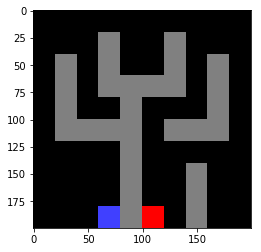

In [21]:
# blue is the start of maze, red is the end
maze.show_game()

In [22]:
rand.seed(5)

In [23]:
learner = ql.QLearner(num_states=100,
    num_actions = 4, 
    alpha = 0.2, 
    gamma = 0.9,
    exploration = 0.99999) #initialize the learner

In [24]:
#each iteration involves one trip to the goal
maze.reset()
maze.printmap()
max_iter = 700

save_iter = [0, 300, 699]
save_graphs = {}

for iteration in range(0, max_iter): 
    steps = 0
    maze.reset()
    game_over = False
    state = maze.get_state()
    action = learner.query(state) #set the state and get first action
    while not game_over:
        state, r, game_over = maze.movebot(action)
        action = learner.query(state, r)
        steps += 1

    if iteration % 200 == 0 or iteration == max_iter-1:
        maze.printmap()
        print("iteration: {} steps: {}".format(iteration, steps))
    
    if iteration in save_iter:
        save_graphs[iteration] = maze.replay.copy()

--------------------
                    
      O     O       
  O   O     O   O   
  O   O O O O   O   
  O     O       O   
  O O O O   O O O   
        O           
        O     O     
        O     O     
      * O X   O     
--------------------
--------------------
. . . . . . . . . . 
. . . O . . O . . . 
. O . O . . O . O . 
. O . O O O O . O . 
. O     O . . . O . 
. O O O O . O O O . 
. . . . O . . . . . 
. . . . O . . O . . 
. . . . O . . O . . 
. . . . O * . O     
--------------------
iteration: 0 steps: 575
--------------------
    . . . . . .     
. . . O . . O .     
. O   O     O . O   
. O   O O O O . O   
. O     O . . . O   
. O O O O . O O O   
. . . . O .         
. . . . O .   O     
. . . . O .   O     
. . . . O *   O     
--------------------
iteration: 200 steps: 100
--------------------
. . . . . . . .     
.     O     O .     
. O   O     O . O   
. O   O O O O . O   
. O     O . . . O   
. O O O O . O O O   
.       O .         
. . . . O .   O     
. . .

In [25]:
iters_graph = 0
animate(save_graphs[iters_graph], path='maze{}'.format(iters_graph), 
        animation='output_maze{}.gif'.format(iters_graph))
from IPython.display import HTML
import random
HTML("<img src='output_maze{}.gif?{}'>".format(iters_graph, round(random.random()*100)))

In [26]:
animate(save_graphs[300], path='maze500', animation='output_maze100.gif')
from IPython.display import HTML
import random
HTML("<img src='output_maze100.gif?{}'>".format(round(random.random()*100)))

In [27]:
animate(save_graphs[699], path='maze999', animation='output_maze199.gif')
from IPython.display import HTML
import random
HTML("<img src='output_maze199.gif?{}'>".format(round(random.random()*100)))